## Q1. Install and load the latest versions of TensorFlow and Keras. Print their versions.

In [1]:
import tensorflow as tf
import os
import keras

In [2]:
# Checking version of Tensorflow ans Keras
print(f"Tensorflow Version {tf.__version__}")
print(f"Keras Version {keras.__version__}")

Tensorflow Version 2.13.0
Keras Version 2.13.1



## Q2. Load the Wine Quality dataset and explore its dimensions. Dataset link: https://www.kaggle.com/datasets/nareshbhat/wine-quality-binary-classification

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [4]:
df = pd.read_csv("https://raw.githubusercontent.com/rachitdani/Datasets/main/wine.csv")
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,bad
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,bad
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,bad
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,good
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,bad


## Q3. Check for null values, identify categorical variables, and encode them.

In [5]:
df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   object 
dtypes: float64(11), object(1)
memory usage: 150.0+ KB


In [7]:
df.duplicated().sum()

240

In [8]:
df.shape

(1599, 12)

In [9]:
df = df.drop_duplicates(keep='first')

In [10]:
df.duplicated(keep=False)
df.shape

(1359, 12)

#### Quality is the only column which needs to be encoded

In [11]:
df['quality'].unique()

array(['bad', 'good'], dtype=object)

In [12]:
mapping_values = {"bad" : 0, "good" : 1}

In [13]:
df['quality'] = df['quality'].map(mapping_values)

<ipython-input-13-3e629e59e229>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['quality'] = df['quality'].map(mapping_values)


In [14]:
df.head(5)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,1
5,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,0


In [15]:
df["quality"].value_counts()

1    719
0    640
Name: quality, dtype: int64

## Q4. Separate the features and target variables from the dataframe.


In [16]:
X = df.drop(labels=["quality"],axis=1)
y = df["quality"]

In [17]:
X.shape , y.shape

((1359, 11), (1359,))

## Q5. Perform a train-test split and divide the data into training, validation, and test datasets.

In [18]:
from sklearn.model_selection import train_test_split

#Splitting data for training and testing
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.20, random_state=42)
#Further splitting the training data into training and validation
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=42)

In [19]:
X_train.shape , y_train.shape

((815, 11), (815,))

In [20]:
X_test.shape , y_test.shape

((272, 11), (272,))

In [21]:
X_val.shape , y_val.shape

((272, 11), (272,))

## Q6. Perform scaling on the dataset.

In [22]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
X_val = scaler.transform(X_val)

## Q7. Create at least 2 hidden layers and an output layer for the binary categorical variables.

In [23]:
from tensorflow.keras.layers import Input, Dense

#Creating layers of ANN
LAYERS = [keras.layers.Input(shape = X_train.shape[1:],name="InputLayer"),
          keras.layers.Dense(200,activation='relu',name="HiddenLayer1"),
          keras.layers.Dense(100,activation='relu',name="HiddenLayer2"),
          keras.layers.Dense(1,activation='sigmoid',name="OutputLayer")
          ]


## Q8. Create a Sequential model and add all the layers to it.

In [24]:
model_clf = keras.models.Sequential(LAYERS)

In [25]:
model_clf.layers

In [26]:
LOSS_FUNCTION = "binary_crossentropy"
OPTIMIZER = "Adam"
METRICS = ["accuracy"]

model_clf.compile(loss=LOSS_FUNCTION,
              optimizer=OPTIMIZER,
              metrics=METRICS)

## Q9. Implement a TensorBoard callback to visualize and monitor the model's training process.

In [27]:
from tensorflow.keras.callbacks import TensorBoard

# Create a TensorBoard callback
tensorboard_callback = TensorBoard(log_dir='./logs', histogram_freq=1)
#tensorboard_callback = keras.callbacks.TensorBoard(log_dir="logs")

# Fit the model with the TensorBoard callback
model_clf.fit(X_train, y_train, epochs=10, validation_data=(X_val, y_val), callbacks=[tensorboard_callback])

Epoch 1/10
26/26 [==============================] - 1s 10ms/step - loss: 0.6233 - accuracy: 0.6491 - val_loss: 0.5276 - val_accuracy: 0.7206
Epoch 2/10
26/26 [==============================] - 0s 4ms/step - loss: 0.5288 - accuracy: 0.7350 - val_loss: 0.5137 - val_accuracy: 0.7353
Epoch 3/10
26/26 [==============================] - 0s 4ms/step - loss: 0.5110 - accuracy: 0.7509 - val_loss: 0.5228 - val_accuracy: 0.7279
Epoch 4/10
26/26 [==============================] - 0s 4ms/step - loss: 0.4953 - accuracy: 0.7669 - val_loss: 0.5143 - val_accuracy: 0.7426
Epoch 5/10
26/26 [==============================] - 0s 5ms/step - loss: 0.4920 - accuracy: 0.7571 - val_loss: 0.5087 - val_accuracy: 0.7169
Epoch 6/10
26/26 [==============================] - 0s 4ms/step - loss: 0.4799 - accuracy: 0.7681 - val_loss: 0.5156 - val_accuracy: 0.7243
Epoch 7/10
26/26 [==============================] - 0s 4ms/step - loss: 0.4721 - accuracy: 0.7620 - val_loss: 0.5041 - val_accuracy: 0.7279
Epoch 8/10
26/26 [=

In [28]:
%load_ext tensorboard

In [29]:
!pip show tensorboard

Name: tensorboard
Version: 2.13.0
Summary: TensorBoard lets you watch Tensors Flow
Home-page: https://github.com/tensorflow/tensorboard
Author: Google Inc.
Author-email: packages@tensorflow.org
License: Apache 2.0
Location: /usr/local/lib/python3.10/dist-packages
Requires: absl-py, google-auth, google-auth-oauthlib, grpcio, markdown, numpy, protobuf, requests, setuptools, tensorboard-data-server, werkzeug, wheel
Required-by: tensorflow


In [30]:
# %tensorboard --logdir= ./logs

In [31]:
# %tensorboard --logdir logs

## Q10. Use Early Stopping to prevent overfitting by monitoring a chosen metric and stopping the training if no improvement is observed.

In [32]:
# Create a Early Stopping callback
early_stopping_cb = keras.callbacks.EarlyStopping(patience=5, restore_best_weights=True)

# Fit the model with the Early Stopping callback
model_clf.fit(X_train, y_train, epochs=10, validation_data=(X_val, y_val), callbacks=[early_stopping_cb])

Epoch 1/10
26/26 [==============================] - 0s 6ms/step - loss: 0.4472 - accuracy: 0.7926 - val_loss: 0.5157 - val_accuracy: 0.7500
Epoch 2/10
26/26 [==============================] - 0s 5ms/step - loss: 0.4332 - accuracy: 0.8012 - val_loss: 0.5076 - val_accuracy: 0.7426
Epoch 3/10
26/26 [==============================] - 0s 5ms/step - loss: 0.4283 - accuracy: 0.7939 - val_loss: 0.5177 - val_accuracy: 0.7574
Epoch 4/10
26/26 [==============================] - 0s 4ms/step - loss: 0.4175 - accuracy: 0.8074 - val_loss: 0.5208 - val_accuracy: 0.7463
Epoch 5/10
26/26 [==============================] - 0s 4ms/step - loss: 0.4175 - accuracy: 0.8061 - val_loss: 0.5184 - val_accuracy: 0.7390
Epoch 6/10
26/26 [==============================] - 0s 5ms/step - loss: 0.4116 - accuracy: 0.8086 - val_loss: 0.5277 - val_accuracy: 0.7426
Epoch 7/10
26/26 [==============================] - 0s 6ms/step - loss: 0.4072 - accuracy: 0.8184 - val_loss: 0.5287 - val_accuracy: 0.7426


## Q11. Implement a ModelCheckpoint callback to save the best model based on a chosen metric during training.

In [33]:
# Create a ModelCheckpoint callback
checkpoint_cb = keras.callbacks.ModelCheckpoint("my_keras_model.h5", save_best_only=True)

# Fit the model with the Early Stopping callback
model_clf.fit(X_train, y_train, epochs=10, validation_data=(X_val, y_val), callbacks=[checkpoint_cb])

Epoch 1/10
26/26 [==============================] - 0s 9ms/step - loss: 0.4304 - accuracy: 0.7963 - val_loss: 0.5225 - val_accuracy: 0.7426
Epoch 2/10
19/26 [====================>.........] - ETA: 0s - loss: 0.4326 - accuracy: 0.8059

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


26/26 [==============================] - 0s 11ms/step - loss: 0.4287 - accuracy: 0.8012 - val_loss: 0.5144 - val_accuracy: 0.7574
Epoch 3/10
26/26 [==============================] - 0s 4ms/step - loss: 0.4195 - accuracy: 0.8074 - val_loss: 0.5201 - val_accuracy: 0.7426
Epoch 4/10
26/26 [==============================] - 0s 5ms/step - loss: 0.4110 - accuracy: 0.8098 - val_loss: 0.5167 - val_accuracy: 0.7574
Epoch 5/10
26/26 [==============================] - 0s 6ms/step - loss: 0.4051 - accuracy: 0.8012 - val_loss: 0.5172 - val_accuracy: 0.7426
Epoch 6/10
26/26 [==============================] - 0s 6ms/step - loss: 0.4031 - accuracy: 0.8184 - val_loss: 0.5187 - val_accuracy: 0.7537
Epoch 7/10
26/26 [==============================] - 0s 6ms/step - loss: 0.3994 - accuracy: 0.8135 - val_loss: 0.5358 - val_accuracy: 0.7390
Epoch 8/10
26/26 [==============================] - 0s 6ms/step - loss: 0.3832 - accuracy: 0.8258 - val_loss: 0.5320 - val_accuracy: 0.7316
Epoch 9/10
26/26 [============

## Q12. Print the model summary.

In [34]:
model_clf.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 HiddenLayer1 (Dense)        (None, 200)               2400      
                                                                 
 HiddenLayer2 (Dense)        (None, 100)               20100     
                                                                 
 OutputLayer (Dense)         (None, 1)                 101       
                                                                 
Total params: 22601 (88.29 KB)
Trainable params: 22601 (88.29 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


## Q13. Use binary cross-entropy as the loss function, Adam optimizer, and include the metric ['accuracy'].

In [35]:
LOSS_FUNCTION = "binary_crossentropy"
OPTIMIZER = "Adam"
METRICS = ["accuracy"]

## Q14. Compile the model with the specified loss function, optimizer, and metrics.

In [36]:
model_clf.compile(loss=LOSS_FUNCTION,
              optimizer=OPTIMIZER,
              metrics=METRICS)

## Q15. Fit the model to the data, incorporating the TensorBoard, Early Stopping, and ModelCheckpoint callbacks.

In [37]:
CALLBACKS = [early_stopping_cb,early_stopping_cb,checkpoint_cb]
history = model_clf.fit(X_train, y_train, epochs=10, validation_data=(X_val, y_val), callbacks= CALLBACKS )

Epoch 1/10
26/26 [==============================] - 1s 14ms/step - loss: 0.3784 - accuracy: 0.8233 - val_loss: 0.5414 - val_accuracy: 0.7500
Epoch 2/10
26/26 [==============================] - 0s 3ms/step - loss: 0.3637 - accuracy: 0.8405 - val_loss: 0.5389 - val_accuracy: 0.7574
Epoch 3/10
26/26 [==============================] - 0s 4ms/step - loss: 0.3559 - accuracy: 0.8282 - val_loss: 0.5530 - val_accuracy: 0.7316
Epoch 4/10
26/26 [==============================] - 0s 4ms/step - loss: 0.3672 - accuracy: 0.8344 - val_loss: 0.5457 - val_accuracy: 0.7537


## Q16. Get the model's parameters.

In [38]:
history.params

{'verbose': 1, 'epochs': 10, 'steps': 26}


## Q17. Store the model's training history as a Pandas DataFrame.

In [39]:
pd.DataFrame(history.history)

,loss,accuracy,val_loss,val_accuracy
0,0.378398,0.823313,0.541403,0.750000
1,0.363735,0.840491,0.538877,0.757353
2,0.355874,0.828221,0.552982,0.731618
3,0.367208,0.834356,0.545732,0.753676


## Q18. Plot the model's training history.

<Axes: >

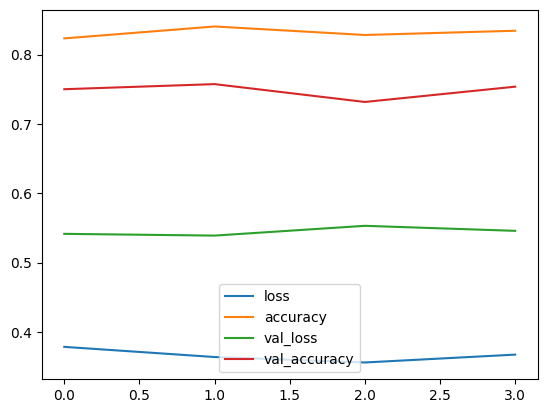

In [40]:
pd.DataFrame(history.history).plot()

## Q19. Evaluate the model's performance using the test data.

In [41]:
model_clf.evaluate(X_test,y_test)

9/9 [==============================] - 0s 1ms/step - loss: 0.5641 - accuracy: 0.7353


[0.564096987247467, 0.7352941036224365]

In [42]:
x_new = X_test[:10]

In [43]:
actual = y_test[:10]
actual

55      0
1291    1
1544    1
593     0
1261    0
491     1
1004    0
889     0
1154    1
824     0
Name: quality, dtype: int64

In [44]:
y_prob = model_clf.predict(x_new)
y_prob

1/1 [==============================] - 0s 61ms/step


array([[0.22193843],
       [0.934744  ],
       [0.9965536 ],
       [0.22906217],
       [0.4549938 ],
       [0.99845284],
       [0.55187166],
       [0.07264818],
       [0.92308724],
       [0.35485294]], dtype=float32)

In [45]:
y_prob.round(3)

array([[0.222],
       [0.935],
       [0.997],
       [0.229],
       [0.455],
       [0.998],
       [0.552],
       [0.073],
       [0.923],
       [0.355]], dtype=float32)

In [46]:
# Predict with threshold set as 0.5
thr = 0.5
ypred = []
for i in y_prob:
    if i>=0.5:
        ypred.append(1)
    else:
        ypred.append(0)

In [47]:
actual

55      0
1291    1
1544    1
593     0
1261    0
491     1
1004    0
889     0
1154    1
824     0
Name: quality, dtype: int64

In [48]:
ypred

[0, 1, 1, 0, 0, 1, 1, 0, 1, 0]

In [49]:
actual = list(actual)
actual

[0, 1, 1, 0, 0, 1, 0, 0, 1, 0]

The actual and predicted values are very close indicating our model created is good